In [1]:
pip install pandas numpy scikit-learn tensorflow flask


Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/all-sensors-16.csv')

# Display the first few rows of the data
print(df.head())


  Local Time (Sensor)        Date      Time  \
0    03/06/2019 01:00  03/06/2019  01:00:00   
1    03/06/2019 01:00  03/06/2019  01:00:00   
2    03/06/2019 01:00  03/06/2019  01:00:00   
3    03/06/2019 01:00  03/06/2019  01:00:00   
4    03/06/2019 01:00  03/06/2019  01:00:00   

                         countlineName direction  Car  Pedestrian  Cyclist  \
0                  S10_EastRoad_CAM003        in   89           9        4   
1                  S10_EastRoad_CAM003       out   51           6        0   
2  S12_DevonshireRoad_CyclePath_CAM003        in    0           0        0   
3  S12_DevonshireRoad_CyclePath_CAM003       out    0           2        0   
4                S13_MiltonRoad_CAM003        in   66           2        5   

   Motorbike  Bus  OGV1  OGV2  LGV  
0          2    1     0     0    5  
1          0    0     1     0    1  
2          0    0     0     0    0  
3          0    0     0     0    0  
4          4    0     0     0    4  


 Preprocess the Data

In [3]:
# Drop unnecessary columns
df = df.drop(['Local Time (Sensor)', 'Date', 'countlineName', 'direction', 'Time'], axis=1)

# Define features (X) and target (y)
X = df.drop(columns=['Car'])  # Predicting car volume (Car)
y = df['Car']


Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Data Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Build the Baseline Neural Network Model

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10498/10498 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 6834.9214 - mae: 36.8737 - val_loss: 3604.4399 - val_mae: 26.8478
Epoch 2/100
10498/10498 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 3559.1494 - mae: 28.4374 - val_loss: 3375.7056 - val_mae: 29.5785
Epoch 3/100
10498/10498 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - loss: 3414.1658 - mae: 27.9246 - val_loss: 3237.8435 - val_mae: 28.1103
Epoch 4/100
10498/10498 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 3264.7183 - mae: 27.3120 - val_loss: 3182.1973 - val_mae: 27.7840
Epoch 5/100
10498/10498 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 3234.5083 - mae: 27.1190 - val_loss: 3144.2351 - val_mae: 25.9694
Epoch 6/100
10498/10498 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 3210.7676 - mae: 26.8562 - val_loss: 3098.7646 - val_mae: 25.6800
Epoch 7/100
10498/10498 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 3179.0938 - mae: 26.7605 - val_loss: 3088.2522 - val_mae: 24.8286
Epoch 8/100
10498/10498 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 3134.9004 - mae: 26.52

 Evaluate the Model

In [7]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {test_mae}")


3281/3281 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2669.1533 - mae: 25.6341
Test MAE: 25.785261154174805


Save the Trained Model

In [8]:
# Save the model
model.save('traffic_volume_model.h5')


Track Training and Validation Metrics

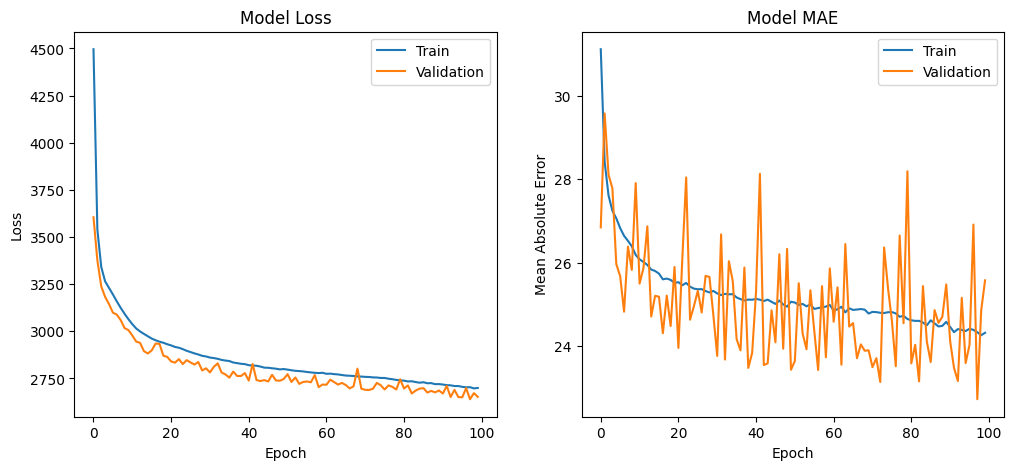

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'])

plt.show()


In [10]:
# Evaluate on training data
train_loss, train_mae = model.evaluate(X_train_scaled, y_train)
print(f"Training Loss: {train_loss}")
print(f"Training MAE: {train_mae}")

# Evaluate on test data (validation set)
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

13122/13122 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 2708.8755 - mae: 25.8535
Training Loss: 2673.9521484375
Training MAE: 25.669086456298828
3281/3281 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2669.1533 - mae: 25.6341
Test Loss: 2701.42529296875
Test MAE: 25.785261154174805


In [13]:
from tensorflow.keras.regularizers import l2
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])


In [14]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1)
])


In [19]:
# Save the model
model.save('traffic_volume_model.h5')
